In [113]:
import numpy as np
import PythonTools as PT
import pandas as pd
from matplotlib import pyplot as plt
import scipy

PT.PlotSettings()

%matplotlib inline

# Load data related to different cereal companies

In [72]:
DF=pd.read_csv('cereal.dat')

In [73]:
DF.head()

,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Shelf,Potass,Vitamins
0,70.0,4.0,1.0,130.0,10.0,5.0,6.0,3.0,280.0,25.0
1,120.0,3.0,5.0,15.0,2.0,8.0,8.0,3.0,135.0,0.0
2,70.0,4.0,1.0,260.0,9.0,7.0,5.0,3.0,320.0,25.0
3,50.0,4.0,0.0,140.0,14.0,8.0,0.0,3.0,330.0,25.0
4,110.0,2.0,2.0,200.0,1.0,14.0,8.0,3.0,-1.0,25.0


# Dissimilarity matrix based on Squared Euclidat distance

In [74]:
D_i=scipy.spatial.distance.pdist(DF)
D_X=scipy.spatial.distance.squareform(D_i)
D_X=D_X**2

# Mult Dimenssional Scaling

In [93]:
def MDS(D_X,K=3): 
    
    '''
    MDS calculation based on input dissimilarity matrix D_X and number of dimenssions K
    '''
    import numpy as np
    import pandas as pd
    
    if (K<2):
        K=2

    N=len(D_X)
    I = np.identity(N)
    H = I - (1 / N)

    # Centered
    D_X_C = np.dot(H, D_X)
    D_X_C = -0.5 * np.dot(D_X_C, H)

    D, V = np.linalg.eig(D_X_C)
    D.sort()
    D = D[::-1] # Descending
    
    D_R=np.zeros((K,K))
    
    for i in range(K):
        D_R[i,i]=np.sqrt(abs(D[i]))
        
    output=np.dot(V[:, :K], D_R)
    output=output.real
    
    if (K>2):
        output[:, 0] = output[:, 0] * -1
        output[:, 2] = output[:, 2] * -1
    else:
        output[:, 1] = output[:, 1] * -1
    
    List=[]
    for i in range(K):
        string='MDS%i'%(i+1)
        List.append(string)
        
    DF=pd.DataFrame(data=output, columns=List)
    
    return DF

In [151]:
MDS_Coords= MDS(D_X,2)
MDS_Coords.head()

,MDS1,MDS2
0,-50.224367,180.772356
1,-148.556802,24.310285
2,74.316827,232.902358
3,-46.627646,231.685944
4,49.009431,-92.807435


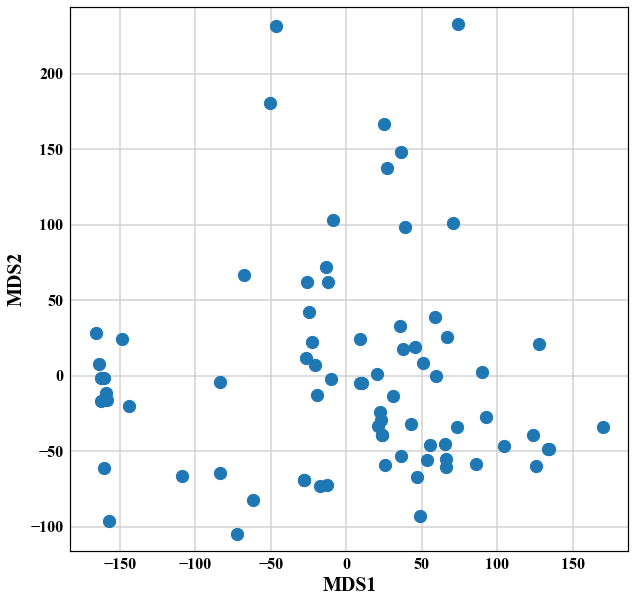

In [156]:
%matplotlib inline 
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.scatter(MDS_Coords['MDS1'], MDS_Coords['MDS2'], s=150)
ax.set_xlabel('MDS1')
ax.set_ylabel('MDS2')
ax.set_aspect('equal', 'datalim')
ax.grid()

In [150]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

p = figure(title = "MDS_2D")
p.xaxis.axis_label = 'MDS 1'
p.yaxis.axis_label = 'MDS 2'

p.circle(MDS_Coords['MDS1'], MDS_Coords['MDS2'],
         color='blue', fill_alpha=0.2, size=10)


show(p)

Loading BokehJS ...

In [129]:
MDS_Coords= MDS(D_X,3)
MDS_Coords.head()

,MDS1,MDS2,MDS3
0,50.224367,-180.772356,17.472406
1,148.556802,-24.310285,-0.076299
2,-74.316827,-232.902358,33.903397
3,46.627646,-231.685944,28.781071
4,-49.009431,92.807435,6.230046


<IPython.core.display.Javascript object>


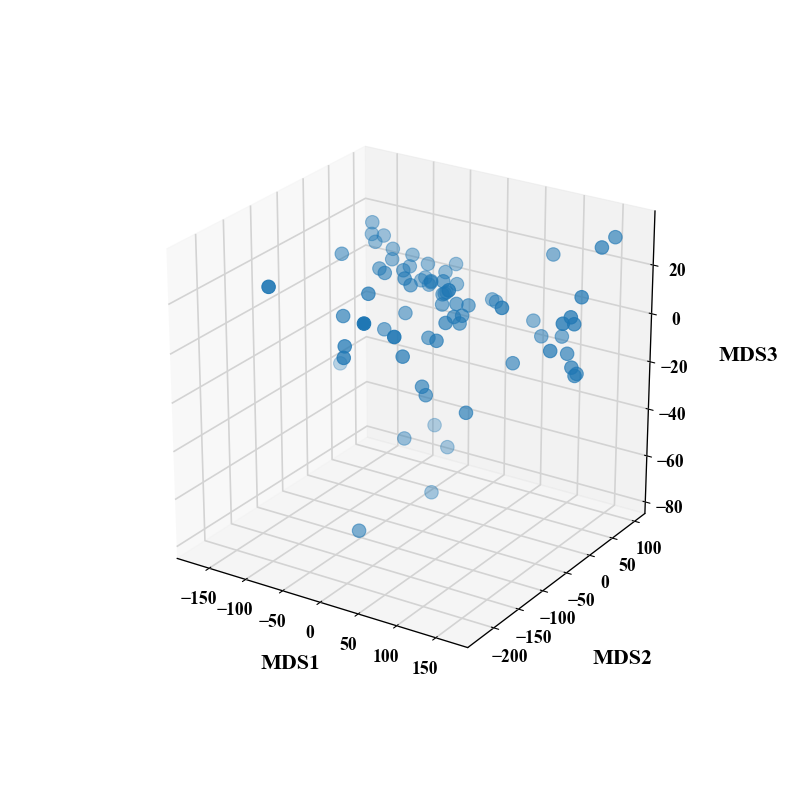

In [147]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(MDS_Coords['MDS1'], MDS_Coords['MDS2'],MDS_Coords['MDS3'], s=150)
ax.set_xlabel('MDS1')
ax.xaxis.labelpad = 20
ax.set_ylabel('MDS2')
ax.yaxis.labelpad = 40
ax.set_zlabel('MDS3')
ax.zaxis.labelpad = 40
ax.set_aspect('equal', 'datalim')